<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/HW5/Copy_of_hacking_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['square', 'isin']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [50]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [51]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


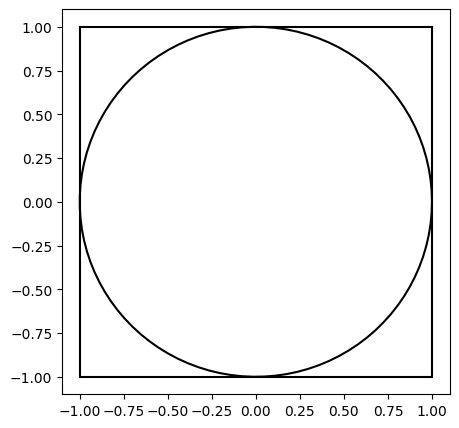

In [52]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [53]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  hyp = np.sqrt(x**2 + y**2)
  if hyp <= l:
    return True
  else:
    return False

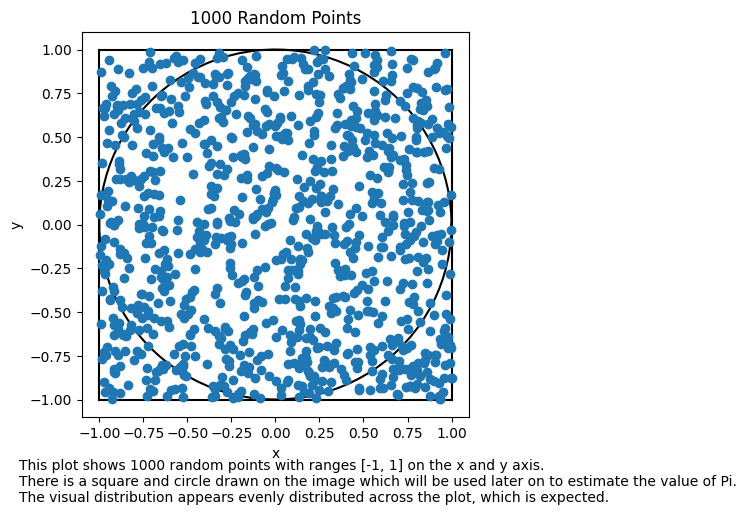

In [54]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
np.random.seed(1234)
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)
x = np.random.uniform(-1, 1, 1000)
y = np.random.uniform(-1, 1, 1000)
plt.title("1000 Random Points")
plt.xlabel("x")
plt.ylabel("y")
plt.figtext(0,-0.06,'This plot shows 1000 random points with ranges [-1, 1] on the x and y axis. \nThere is a square and circle drawn on the image which will be used later on to estimate the value of Pi.\nThe visual distribution appears evenly distributed across the plot, which is expected.')
plt.plot(x, y, 'o')
plt.show()

In [55]:
# what is the ratio of points in and out of the circle? can you get to pi from it?
countin = 0
countout = 0
for i in range(1000):
  if isin(x[i], y[i], 1):
    countin += 1
  else:
    countout += 1
print(countin, countout)
print(countin / countout)
print((countin/1000)*4)
plt.show()

765 235
3.25531914893617
3.06


### As we can see, the ratio of the inside / outside is 3.25. Using some simple geometry we can derive pi from these 2 numbers, the in circle and total points.

$$ A_c = πr^2 $$
$$ A_s = 4r^2 $$
$$ \frac{A_c}{A_s} = \frac{\pi r^2}{4r^2} $$
$$ \pi = \frac{A_c}{A_s} × 4 $$

### So, we can get an approximation of pi from the ratio of the points in the circle vs total points. For 1000 points, I get 3.06 .

In [56]:
np.random.seed(1234)
x = np.random.uniform(-1, 1, 10000000)
y = np.random.uniform(-1, 1, 10000000)
countin = 0
countout = 0

for i in range(10000000):
  if isin(x[i], y[i], 1):
    countin += 1
  else:
    countout += 1
print(countin, countout)
print(countin / countout)
print((countin / (countout+countin))*4)
plt.show()


7855722 2144278
3.663574405930574
3.1422888


### As we can see by increasing the sample size we achieve a closer approximation to pi. With 10000000 points, I got an approximation of pi of 3.14.